In [1]:
import pandas as pd
dataset = pd.read_csv('insurance.csv')

In [2]:
dataset.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [4]:
dataset.isnull().sum()

index       0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values in the dataset

In [5]:
# data preprocessing
# converting the columns from string categorical values to int categorical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# columns that need to be encoded are 'sex' , 'smoker' , 'region'
dataset['SEX'] = le.fit_transform(dataset['sex'])
dataset['Smoker'] = le.fit_transform(dataset['smoker'])
dataset['Region'] = le.fit_transform(dataset['region'])
dataset.drop(['sex','smoker','region'], inplace = True , axis = 1)

In [6]:
dataset.head()

,index,age,bmi,children,charges,SEX,Smoker,Region
0,0,19,27.900,0,16884.92400,0,1,3
1,1,18,33.770,1,1725.55230,1,0,2
2,2,28,33.000,3,4449.46200,1,0,2
3,3,33,22.705,0,21984.47061,1,0,1
4,4,32,28.880,0,3866.85520,1,0,1


In [7]:
dataset.drop('index',inplace = True , axis = 1)

<Axes: >

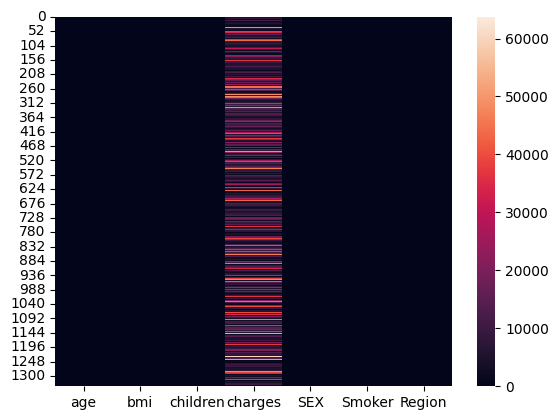

In [8]:
import seaborn as sns
sns.heatmap(dataset)

In [9]:
dataset['SEX'].value_counts()

1    676
0    662
Name: SEX, dtype: int64

In [10]:
dataset['Smoker'].value_counts()

0    1064
1     274
Name: Smoker, dtype: int64

In [11]:
dataset['Region'].value_counts()

2    364
3    325
1    325
0    324
Name: Region, dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
rfr = RandomForestRegressor()


In [13]:
# splitting the data

x = dataset.drop('charges',axis =1)
y = dataset['charges']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [14]:
# training the model

lr.fit(x_train,y_train)
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [15]:
y_pred = lr.predict(x_test)

In [16]:
y_pred_rfr = rfr.predict(x_test)
y_pred_rfr

array([ 9727.843048  ,  6442.532679  ,  8980.8030352 , 18696.1371124 ,
       47794.2369081 , 27861.6765045 ,  5074.9446322 , 11780.7713465 ,
       10930.6709891 , 28376.335598  , 19512.1672145 , 24117.6347455 ,
        5384.9299761 , 13144.9240175 , 19160.2541083 , 12508.3970333 ,
        7705.6113887 , 12509.1246221 , 12728.8408337 ,  9775.8431093 ,
       12922.9909319 ,  4394.7703965 ,  5219.3381094 ,  5009.652755  ,
       53210.6278791 , 14541.680729  ,  4461.9037619 , 10112.4758646 ,
       45390.294604  , 10173.3905859 , 13693.376189  , 11644.9905366 ,
       18065.0096845 ,  7374.8856382 , 23018.4261893 , 53553.9366617 ,
        5311.9936876 , 20133.4199713 ,  7437.6685659 , 34229.843179  ,
       14289.070852  , 11824.9160598 , 11657.7423352 , 22186.2677956 ,
       10547.2637348 ,  6741.5719423 , 19562.0692395 , 19327.0310189 ,
        2727.1366267 ,  6473.107038  , 33519.476796  , 13474.7434985 ,
        7769.039159  ,  1724.86263   , 18306.0220998 ,  3522.2978801 ,
      

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_absolute_error(y_test,y_pred))

4592.269409617487


In [18]:
print(mean_squared_error(y_test,y_pred_rfr))

29982650.854605064


In [19]:
print(mean_absolute_error(y_test,y_pred_rfr))

3092.8981741550388


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50,75,100,125,150],
    'criterion' : ['squared_error','absolute_error','friedman_mse','poisson'],
}
rfr_gs = GridSearchCV(RandomForestRegressor(),param_grid,n_jobs=-1,verbose = 2, cv = 5)
rfr_gs.fit(x_train,y_train)
print("Best Parameters : ",rfr_gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters :  {'criterion': 'poisson', 'n_estimators': 100}


In [20]:
rfr_bm = RandomForestRegressor(n_estimators=100, criterion='poisson')
rfr_bm.fit(x_train,y_train)
print(mean_absolute_error(y_test,rfr_bm.predict(x_test)))
print(mean_squared_error(y_test,rfr_bm.predict(x_test)))

3061.536166394683
29836414.285766385


The difference in the error was minute which implies we will have to find the other hyperparameters which will improve the model.

Sandardizing the data to reduce the error

In [25]:
from sklearn.preprocessing import StandardScaler

x_train_stand = x_train.copy()
x_test_stand = x_test.copy()

column_list = dataset.columns

for i in column_list:

  scale = StandardScaler().fit(x_train_stand)
  x_train_stand = scale.transform(x_train_stand)
  x_test_stand = scale.transform(x_test_stand)

x_train_stand

array([[-1.4930183 ,  1.02348034, -0.89921267, -1.00562329, -0.49853929,
         0.43866318],
       [ 0.57974613, -0.45331389, -0.89921267, -1.00562329,  2.00585996,
         0.43866318],
       [ 1.15154322, -0.12586506, -0.89921267, -1.00562329, -0.49853929,
        -1.36660452],
       ...,
       [ 0.93711931,  2.64435205,  3.27319652, -1.00562329, -0.49853929,
         0.43866318],
       [-0.84974658, -0.23719766, -0.89921267,  0.99440816,  2.00585996,
         0.43866318],
       [ 1.5089164 , -0.0161697 , -0.89921267, -1.00562329, -0.49853929,
         1.34129703]])

In [26]:
rfr_s = RandomForestRegressor(n_estimators = 100, criterion = 'poisson')
rfr_s.fit(x_train_stand,y_train)
print(mean_squared_error(y_test, rfr_s.predict(x_test_stand)))

30031419.097930986


In [28]:
, median_absolute_error
print(mean_absolute_error(y_test, rfr_s.predict(x_test_stand)))

3074.6806485468596
